<a href="https://colab.research.google.com/github/francotestori/aauba_02/blob/master/Training_held_out_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Armado del DataFrame

In [31]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.externals import joblib
import matplotlib.pyplot as plt
# Encoders & Split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Parameter Tuning
from sklearn.model_selection import GridSearchCV
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# Scoring & Reporting
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
print('Libraries Imported')

Libraries Imported


In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/francotestori/aauba_02/master/resources/audio_digits.csv'
df = pd.read_csv(url,index_col=0)

df.head()

,mfcc_0_mean,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,mfcc_11_mean,energy_mean,mfcc_0_std,mfcc_1_std,mfcc_2_std,mfcc_3_std,mfcc_4_std,mfcc_5_std,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,energy_std,dmfcc_0_mean,dmfcc_1_mean,dmfcc_2_mean,dmfcc_3_mean,dmfcc_4_mean,dmfcc_5_mean,dmfcc_6_mean,dmfcc_7_mean,dmfcc_8_mean,dmfcc_9_mean,dmfcc_10_mean,dmfcc_11_mean,denergy_mean,dmfcc_0_std,dmfcc_1_std,dmfcc_2_std,dmfcc_3_std,dmfcc_4_std,dmfcc_5_std,dmfcc_6_std,dmfcc_7_std,dmfcc_8_std,dmfcc_9_std,dmfcc_10_std,dmfcc_11_std,denergy_std,ddmfcc_0_mean,ddmfcc_1_mean,ddmfcc_2_mean,ddmfcc_3_mean,ddmfcc_4_mean,ddmfcc_5_mean,ddmfcc_6_mean,ddmfcc_7_mean,ddmfcc_8_mean,ddmfcc_9_mean,ddmfcc_10_mean,ddmfcc_11_mean,ddenergy_mean,ddmfcc_0_std,ddmfcc_1_std,ddmfcc_2_std,ddmfcc_3_std,ddmfcc_4_std,ddmfcc_5_std,ddmfcc_6_std,ddmfcc_7_std,ddmfcc_8_std,ddmfcc_9_std,ddmfcc_10_std,ddmfcc_11_std,ddenergy_std,digit
0,-361.668962,53.859608,-6.401287,10.504276,-3.063851,6.977546,-10.760357,9.866350,-7.370083,5.051000,-8.156331,6.235290,0.020506,84.485822,36.688378,32.587302,27.525683,12.506436,18.707495,18.116925,8.329306,12.290994,7.297515,6.983674,5.416876,0.021759,0.359901,0.330505,0.226528,-0.021894,-0.114450,-0.000125,0.052082,0.350795,0.457632,0.267502,0.047328,0.106565,0.000017,23.321771,14.697988,14.023375,13.346168,7.113900,8.144410,7.238074,6.321893,8.587937,5.851012,5.810887,4.690040,0.005552,-0.244996,-0.182200,0.016071,0.149166,0.174072,-0.114410,-0.093302,0.108464,0.012912,-0.257687,-0.302846,-0.123361,-0.000003,16.897698,15.136910,10.813695,11.576804,7.798867,8.156207,5.955693,6.824333,9.274772,7.424050,7.378358,6.327442,0.002906,zero
1,-344.429501,62.971646,2.681298,32.594575,8.551349,3.027861,-19.559357,-7.843833,-16.635529,2.141704,-11.552719,-4.756587,0.118753,173.649231,95.038258,53.529298,42.021534,24.892815,35.768404,22.211827,24.265273,15.124858,12.671261,13.990900,9.912509,0.123166,0.260390,0.334700,0.246556,0.131604,0.014532,-0.091141,-0.176278,-0.228289,-0.235325,-0.197977,-0.132908,-0.062320,-0.000021,56.698277,33.695692,24.187970,20.884370,10.510898,15.940563,11.625681,12.151329,11.425712,8.151023,6.990844,8.121423,0.035362,-0.910990,0.726239,-0.735316,-0.120967,0.361948,-0.793723,0.870366,-0.597435,0.426952,0.141512,-0.224778,0.492211,-0.000677,44.595048,34.310766,19.642012,22.839959,9.655708,13.889084,14.058253,10.832590,14.331551,11.756045,7.560719,11.408998,0.020434,zero
2,-381.906240,131.083215,2.012445,-2.563179,-15.922072,-7.889542,-20.937417,-0.064021,-10.726910,-9.290048,-16.011377,0.984315,0.042835,149.161164,76.830646,36.360022,31.036041,20.566772,18.434693,20.981280,12.833288,9.960668,8.793140,15.277377,6.334916,0.038487,-5.321107,2.195576,-1.007546,-0.641226,1.343937,-0.987439,0.099842,1.208208,0.609522,0.137784,0.701948,-0.386948,-0.000283,31.632638,23.050736,15.745608,10.699331,9.154738,8.849845,9.485480,7.940487,5.662432,5.191579,5.311871,4.591579,0.010598,-2.742922,-0.456658,-0.751993,0.126027,0.180305,0.301520,0.225588,-0.150963,0.048313,0.099245,0.260038,0.153182,-0.000041,16.727111,17.354693,14.925466,9.995126,8.587932,7.835087,9.674393,8.459633,6.429986,6.019982,6.302291,6.111948,0.006472,zero
3,-329.006034,89.473208,-8.629773,41.554231,9.980941,-7.126969,-1.424785,-17.449013,9.463047,4.690114,-24.510781,-4.587081,0.094111,184.086326,85.194146,42.588011,36.838445,20.480218,21.511364,16.249922,17.228201,14.757756,7.775876,14.650661,11.611371,0.101597,-0.902751,0.393178,1.436376,-0.065834,-0.407902,0.427270,0.805424,0.465727,-0.252292,0.078161,0.532303,-0.077415,-0.000004,57.933840,31.254174,18.373933,19.715451,13.388871,10.480729,8.742591,10.220457,7.332688,6.213142,7.831121,7.793500,0.025616,-1.316537,-0.830679,-0.070027,-0.317255,0.099754,0.125140,-0.098501,0.102492,-0.181358,-0.120128,0.404970,0.299215,-0.000032,42.029108,28.110167,17.748159,23.588933,13.925842,11.329843,9.734676,12.571344,7.648433,7.622476,9.61716

# Split Train-Test

In [33]:
from sklearn.model_selection import train_test_split

df_features = df.loc[:, df.columns != 'digit']
df_target = df['digit'] # DIGIT ES LO QUE QUEREMOS PREDECIR

X_dev, X_test, y_dev, y_test = train_test_split(
    df_features.values, 
    df_target.values, 
    test_size=0.3, 
    random_state=4589,
    stratify=df_target.values
)

X_train, X_val, y_train, y_val = train_test_split(
    X_dev, 
    y_dev, 
    test_size=0.3, 
    random_state=4589,
    stratify=y_dev
)

print(f'Entrenamiento: {len(X_train)}')
print('Validacion: {}'.format(len(X_val)))
print(f'Held-out: {len(X_test)}')


Entrenamiento: 11596
Validacion: 4970
Held-out: 7100


In [34]:
# Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [35]:
pd.Series(y_train).unique()

array(['nine', 'three', 'two', 'eight', 'six', 'seven', 'five', 'four',
       'one', 'zero'], dtype=object)

In [36]:
for k,title in enumerate(pd.Series(y_train).unique()):
    print(f'Y >  {title}', end='\t')
    perc_train = pd.Series(y_train).value_counts(normalize=True)
    perc_val = pd.Series(y_val).value_counts(normalize=True)
    perc_test = pd.Series(y_test).value_counts(normalize=True)
    print(f'Entrenamiento:{perc_train[k]:.5}', end='\t')
    print(f'Validación:{perc_val[k]:.5}', end='\t')
    print(f'Held-out:{perc_train[k]:.5}')

Y >  nine	Entrenamiento:0.10047	Validación:0.1004	Held-out:0.10047
Y >  three	Entrenamiento:0.10038	Validación:0.1004	Held-out:0.10038
Y >  two	Entrenamiento:0.10029	Validación:0.1002	Held-out:0.10029
Y >  eight	Entrenamiento:0.10021	Validación:0.1002	Held-out:0.10021
Y >  six	Entrenamiento:0.10012	Validación:0.1002	Held-out:0.10012
Y >  seven	Entrenamiento:0.10012	Validación:0.1	Held-out:0.10012
Y >  five	Entrenamiento:0.099862	Validación:0.1	Held-out:0.099862
Y >  four	Entrenamiento:0.099603	Validación:0.099598	Held-out:0.099603
Y >  one	Entrenamiento:0.099517	Validación:0.099598	Held-out:0.099517
Y >  zero	Entrenamiento:0.099431	Validación:0.099396	Held-out:0.099431


# Naive Bayes

In [18]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_val)

In [ ]:
print(gnb.classes_)
print(gnb.get_params())

# Mean of each feature per class
print(gnb.theta_) 

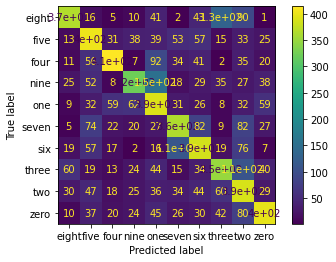

In [20]:
# Confusion Matrix
plot_confusion_matrix(gnb, X_val, y_val)

In [21]:
# Classification Report
gnb_report = classification_report(y_val,gnb_y_pred)
print(gnb_report)

              precision    recall  f1-score   support

       eight       0.67      0.52      0.58       705
        five       0.51      0.57      0.54       707
        four       0.68      0.58      0.63       712
        nine       0.60      0.46      0.52       709
         one       0.44      0.55      0.49       711
       seven       0.53      0.51      0.52       713
         six       0.50      0.54      0.52       711
       three       0.52      0.50      0.51       707
         two       0.41      0.55      0.47       712
        zero       0.62      0.56      0.59       713

    accuracy                           0.53      7100
   macro avg       0.55      0.53      0.54      7100
weighted avg       0.55      0.53      0.54      7100



# RandomForestClassifier

In [24]:
rf = RandomForestClassifier(
    random_state=4589
)
rf.fit(X_train, y_train)
print("Accuracy training : {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(rf.score(X_val, y_val)))

Accuracy training : 1.000
Accuracy test: 0.710


In [25]:
parameters = {
    'n_estimators':range(50, 200, 5), 
    'max_depth':range(1,6), 
    'bootstrap':[True, False]
}
clf = GridSearchCV(
    RandomForestClassifier(
        random_state=4589
    ), 
    parameters, 
    n_jobs=10, 
    scoring='accuracy'
)

clf.fit(X_train, y_train)
rf = clf.best_estimator_
print (clf.best_score_, clf.best_params_)
print("Accuracy training : {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(rf.score(X_val, y_val)))

0.5624169595060952 {'bootstrap': True, 'max_depth': 5, 'n_estimators': 175}
Accuracy training : 0.590
Accuracy test: 0.563


In [30]:
best_rfc = RandomForestClassifier(
  random_state=4589,
  bootstrap = True,
  max_depth = 5,
  n_estimators = 175
)
best_rfc.fit(X_train, y_train)
print("Accuracy training : {:.3f}".format(best_rfc.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(best_rfc.score(X_val, y_val)))

Accuracy training : 0.590
Accuracy test: 0.563


# Gradient Boosting Machines

In [32]:
gb = GradientBoostingClassifier(
    random_state=4589
)
gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_val, y_val)))

Accuracy on training set: 0.836
Accuracy on test set: 0.723


In [ ]:
parameters = {
    'n_estimators':range(50, 200, 5),  
    'max_depth':range(1,6), 
    'learning_rate': np.linspace(0 ,0.1, 10)
}
clf = GridSearchCV(
    GradientBoostingClassifier(
        random_state=4589
    ), 
    parameters, 
    n_jobs=10, 
    scoring='accuracy'
)

clf.fit(X_train, y_train)
rf = clf.best_estimator_
print (clf.best_score_, clf.best_params_)
print("Accuracy training : {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(rf.score(X_val, y_val)))